# Financials (Income Statement + Cash Flows)

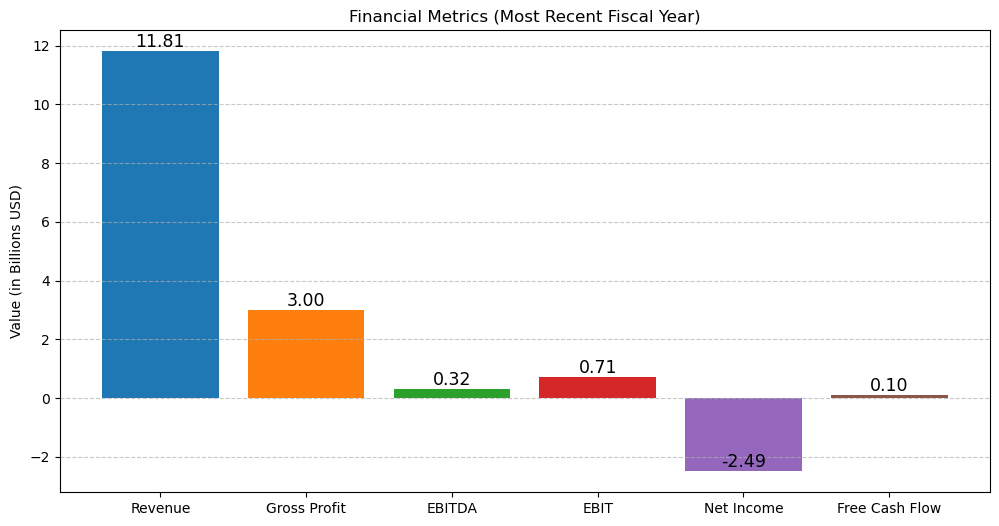

Date
1987-02-17 00:00:00-05:00    0.066667
1987-05-14 00:00:00-04:00    0.080000
1987-08-20 00:00:00-04:00    0.080000
1987-09-25 00:00:00-04:00    0.032000
1987-11-19 00:00:00-05:00    0.120000
                               ...   
2023-11-29 00:00:00-05:00    0.400000
2024-03-04 00:00:00-05:00    0.250000
2024-06-04 00:00:00-04:00    0.250000
2024-09-05 00:00:00-04:00    0.250000
2024-11-27 00:00:00-05:00    0.250000
Name: Dividends, Length: 155, dtype: float64


In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker for Microsoft
ticker = "NEM"

# Fetch the financial data using yfinance
msft = yf.Ticker(ticker)

# Extract financial metrics from the financials and cashflow data
financials = msft.financials
cashflow = msft.cashflow

# Extract the most recent available data for the metrics
revenue = financials.loc["Total Revenue"].iloc[0] / 1e9  # Scale by 1e11
gross_profit = financials.loc["Gross Profit"].iloc[0] / 1e9
ebitda = financials.loc["EBITDA"].iloc[0] / 1e9
ebit = financials.loc["Operating Income"].iloc[0] / 1e9  # EBIT is Operating Income
net_income = financials.loc["Net Income"].iloc[0] / 1e9
free_cash_flow = cashflow.loc["Free Cash Flow"].iloc[0] / 1e9


# Data for the bar chart
metrics = ["Revenue", "Gross Profit", "EBITDA", "EBIT", "Net Income", "Free Cash Flow"]
values = [revenue, gross_profit, ebitda, ebit, net_income, free_cash_flow]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(metrics, values, color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', size = 12.5)

# Add labels and title
plt.title("Financial Metrics (Most Recent Fiscal Year)")
plt.ylabel("Value (in Billions USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar chart
plt.show()

print(msft.dividends)


# Balance Sheet

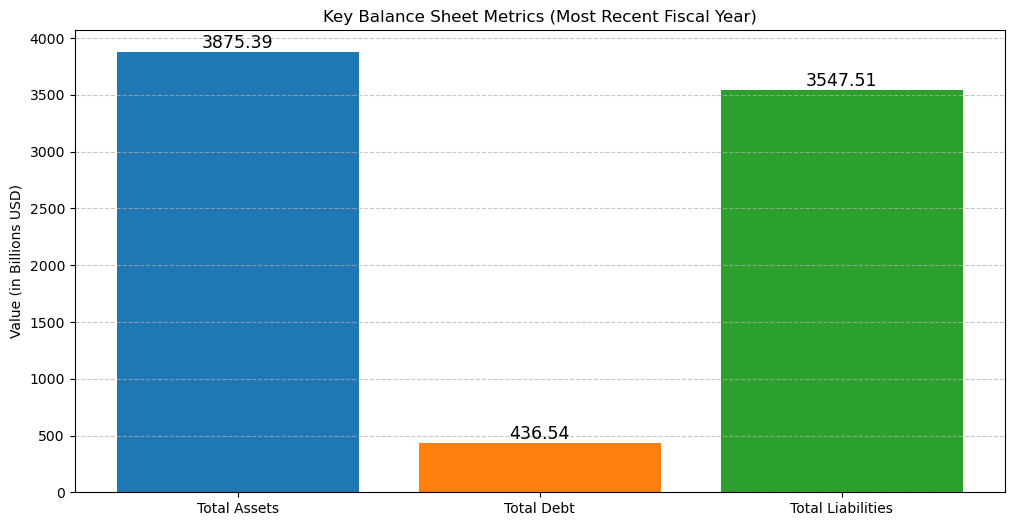

Dividends (Last Few Years):
Date
2022-07-05 00:00:00-04:00    1.00
2022-10-05 00:00:00-04:00    1.00
2023-01-05 00:00:00-05:00    1.00
2023-04-05 00:00:00-04:00    1.00
2023-07-05 00:00:00-04:00    1.00
2023-10-05 00:00:00-04:00    1.05
2024-01-04 00:00:00-05:00    1.05
2024-04-04 00:00:00-04:00    1.15
2024-07-05 00:00:00-04:00    1.15
2024-10-04 00:00:00-04:00    1.25
Name: Dividends, dtype: float64


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol for Berkshire Hathaway Class B
ticker = "JPM"

# Fetch the financial data using yfinance
brk = yf.Ticker(ticker)

# Extract balance sheet data
balance_sheet = brk.balance_sheet

# Handle cases where certain metrics may not exist
try:
    total_assets = balance_sheet.loc["Total Assets"].iloc[0] / 1e9  # Convert to billions
    total_liabilities = balance_sheet.loc["Total Liabilities Net Minority Interest"].iloc[0] / 1e9
    total_debt = (balance_sheet.loc["Total Debt"].iloc[0]) / 1e9
except KeyError as e:
    print(f"KeyError: Missing data for {e}")
    total_assets = total_liabilities = net_debt = 0

# Data for the bar chart
metrics = ["Total Assets", "Total Debt", "Total Liabilities"]
values = [total_assets, total_debt, total_liabilities]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(metrics, values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', size = 12.5)

# Add labels and title
plt.title("Key Balance Sheet Metrics (Most Recent Fiscal Year)")
plt.ylabel("Value (in Billions USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar chart
plt.show()

# Display dividend information
print("Dividends (Last Few Years):")
print(brk.dividends.tail(10))  # Show the most recent 10 dividends.
